# Lab-1: Load and Explore the Data Analysis (EDA)  

In [62]:
# Task 1: Import the pandas library for data manipulation.
import pandas as pd

In [63]:
# Task 2: Load the 'train.csv' file into a DataFrame called df and preview the first rows.
# df=pd.read_csv("D:\mlpipeline\Time-Series-Projects\Time Series Analysis\train.csv")
df=pd.read_csv("train.csv")
df 

C:\Users\user\AppData\Local\Temp\ipykernel_3312\2047337071.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [64]:
# Task 3: Inspect the structure of the DataFrame using df.info().
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [65]:
# Task 4: Print the unique values in 'StateHoliday' and their counts.
df["StateHoliday"].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [66]:
# Task 5: Binarize the 'StateHoliday' column so that any of 'a', 'b', or 'c' becomes 1 and 0 stays 0.
# Then, print the updated value counts.
df['StateHoliday'] = df['StateHoliday'].isin(['a','b','c']).astype(int)
df['StateHoliday'].value_counts() 


StateHoliday
0    986159
1     31050
Name: count, dtype: int64

# Lab-2:Subsetting Stores and Basic Aggregations

In [67]:
# Task 1: Count how many unique stores exist in the dataset.
print(f"There are {len(df.Store.unique())} stores")

There are 1115 stores


In [68]:
# Task 2: Count how many unique Customers exist in the dataset.
print(f"There are {len(df.Customers.unique())} Customers")

There are 4086 Customers


In [69]:
# Task 3: Subset the data to 10 random stores (seed = 1502) and store the result in df_10.
df.Store.sample(10, random_state=1502)
df_10 = df[df.Store.isin(df.Store.sample(10, random_state = 1502))].copy()
df_10

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
23,24,5,2015-07-31,14190,1082,1,1,0,1
46,47,5,2015-07-31,9379,1021,1,1,0,1
155,156,5,2015-07-31,8828,821,1,1,0,1
263,264,5,2015-07-31,8303,992,1,1,0,1
266,267,5,2015-07-31,11326,1217,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016447,353,2,2013-01-01,3139,820,1,0,1,1
1016857,763,2,2013-01-01,0,0,0,0,1,1
1016888,794,2,2013-01-01,0,0,0,0,1,1
1016956,862,2,2013-01-01,0,0,0,0,1,1


In [70]:
# Task 4: Compute the mean sales for each of the 10 stores and sort them in descending order.
df_10.groupby('Store')['Sales'].mean().sort_values(ascending = False)

Store
24     7763.773885
267    7731.106157
862    7128.519108
47     5946.666667
264    5851.901274
156    5779.171975
353    5579.376858
763    5097.873673
864    3520.780255
794    2553.475584
Name: Sales, dtype: float64

In [71]:
# Task 5: For each store, find the index (row) of the day with the all-time highest sales.
df_10.groupby('Store')['Sales'].idxmax().sort_values(ascending = False)

Store
864    947828
862    627821
156    627115
763    619917
264    455513
24     408443
794    245456
267    245014
353    101817
47      34611
Name: Sales, dtype: int64

# Lab-3: Working with Datetime Index and Weekday Patterns

In [ ]:
# Task 1: Set the 'Date' column as the index of df_10 and preview the first rows.
df_10.set_index("Date", inplace=True)
df_10.head(5) 

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,24,5,14190,1082,1,1,0,1
2015-07-31,47,5,9379,1021,1,1,0,1
2015-07-31,156,5,8828,821,1,1,0,1
2015-07-31,264,5,8303,992,1,1,0,1
2015-07-31,267,5,11326,1217,1,1,0,1


In [74]:
# Task 2: Convert the index of df_10 to a proper datetime type.
df_10.index = pd.to_datetime(df_10.index)
df_10.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=9420, freq=None)

In [75]:
# Task 3: Compute the average sales per weekday and per store.
df_10.groupby([df_10.index.dayofweek, 'Store'])['Sales'].mean()

Date  Store
0     24       10860.119403
      47        7877.686567
      156       8707.940299
      264       8320.291045
      267       8969.253731
                   ...     
6     353       7255.343284
      763          0.000000
      794          0.000000
      862          0.000000
      864          0.000000
Name: Sales, Length: 70, dtype: float64

<Axes: xlabel='Date'>

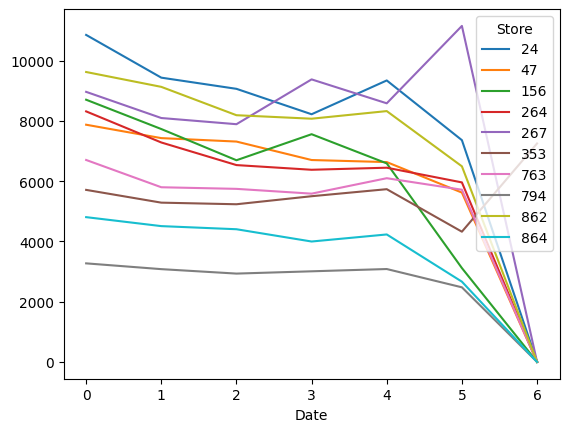

In [77]:
# Task 4: Visualize the average sales per weekday and per store as a line plot.
df_10.groupby([df_10.index.dayofweek, 'Store'])['Sales'].mean().unstack().plot()

# Lab-4: Standardizing Sales and Comparing Weekday Patterns

In [79]:
# Task 1: Define a function that standardizes a numeric Series using z-scores.
def standardize(series):
  return (series - series.mean()) / series.std()

In [80]:
# Task 2: Standardize the 'Sales' column within each store and store the result in a new column 'Sales_std'.
df_10.loc[:, 'Sales_standardized'] = df_10.groupby('Store')['Sales'].transform(standardize)
df_10.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_standardized
Date,,,,,,,,,
2015-07-31,24,5,14190,1082,1,1,0,1,1.504863
2015-07-31,47,5,9379,1021,1,1,0,1,1.103818


In [81]:
# Task 3: Compute the mean of standardized sales per weekday and per store.
df_10.groupby(['DayOfWeek', 'Store'])['Sales_standardized'].mean()

DayOfWeek  Store
1          24       0.725087
           47       0.621004
           156      0.799508
           264      0.702281
           267      0.293913
                      ...   
7          353      1.070822
           763     -1.945422
           794     -1.999880
           862     -1.901085
           864     -1.848743
Name: Sales_standardized, Length: 70, dtype: float64

<Axes: xlabel='DayOfWeek'>

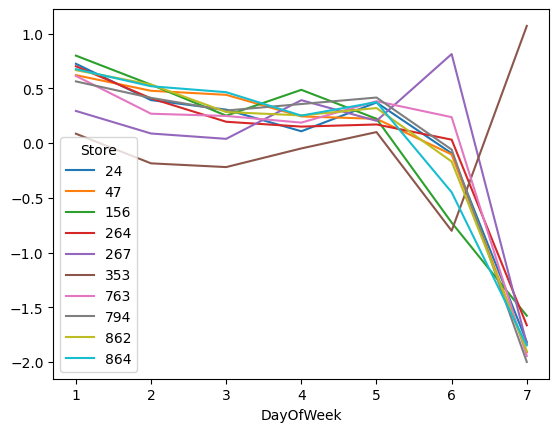

In [82]:
# Task 4: Visualize the standardized mean sales per weekday and store as a line plot.
df_10.groupby(['DayOfWeek', 'Store'])['Sales_standardized'].mean().unstack().plot()

# Lab-5:Analyzing Sales on a Specific Weekday

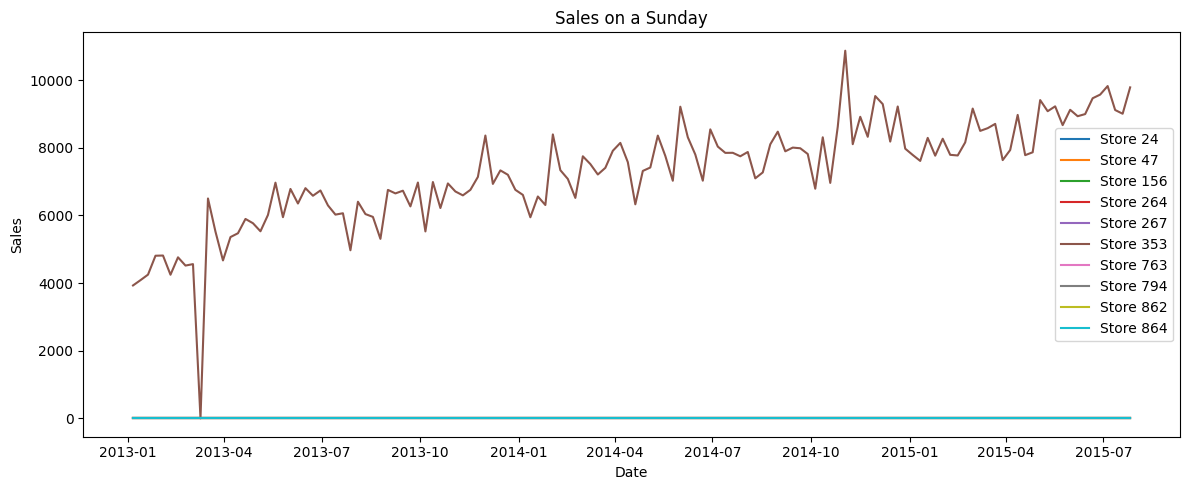

In [83]:
# Task 1: Filter the data to DayOfWeek = 7 and visualize sales over time for each store.
import matplotlib.pyplot as plt

df_d7 = df_10[df_10.DayOfWeek == 7].copy()

plt.figure(figsize = (12, 5))
for store, data in df_d7.groupby('Store'):
  plt.plot(data.index, data.Sales, label = f"Store {store}")
plt.title("Sales on a Sunday")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

# Lab-6:Removing Outliers and Re-Assessing Intra-Week Seasonality

In [84]:
# Task 1: Remove observations for DayOfWeek = 7 and for Store 353, and create a cleaned DataFrame df_clean.
df_clean = df_10[(df_10['DayOfWeek'] != 7) & (df_10['Store'] != 353)].copy()
df_clean.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_standardized
Date,,,,,,,,,
2015-07-31,24,5,14190,1082,1,1,0,1,1.504863
2015-07-31,47,5,9379,1021,1,1,0,1,1.103818
2015-07-31,156,5,8828,821,1,1,0,1,0.832283
2015-07-31,264,5,8303,992,1,1,0,1,0.697361
2015-07-31,267,5,11326,1217,1,1,0,1,0.853360


In [85]:
# Task 2: Re-standardize the 'Sales' column within each store in df_clean.
df_clean['Sales_standardized'] = df_clean.groupby('Store')['Sales'].transform(standardize)
df_clean.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_standardized
Date,,,,,,,,,
2015-07-31,24,5,14190,1082,1,1,0,1,1.658935
2015-07-31,47,5,9379,1021,1,1,0,1,1.162338


In [88]:
# Task 3: Compute the mean of standardized sales per weekday and per store in df_clean.
intra_week = df_clean.groupby(['DayOfWeek', 'Store'])['Sales_standardized'].mean()
intra_week.info()

<class 'pandas.core.series.Series'>
MultiIndex: 54 entries, (np.int64(1), np.int64(24)) to (np.int64(6), np.int64(864))
Series name: Sales_standardized
Non-Null Count  Dtype  
--------------  -----  
54 non-null     float64
dtypes: float64(1)
memory usage: 772.0 bytes


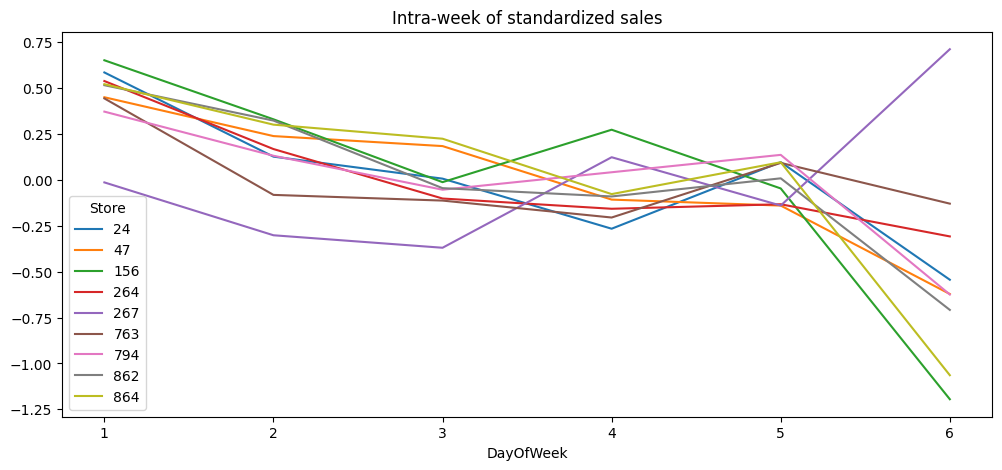

In [ ]:
# Task 4: Visualize the intra-week seasonality using the standardized sales.
intra_week.unstack().plot(figsize = (12 , 5),title = "Intra-week of standardized sales")
plt.show()

In [ ]:
# Lab-7: Analyzing the Impact of Promotions

In [90]:
# Task 1: Compare average sales on promotion days versus non-promotion days.
df.groupby('Promo')['Sales'].mean()

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

In [92]:
# Task 2: Compute the mean sales per store split by promotion status and store the result in promo_uplift.
promo_uplift = df.groupby(['Store', 'Promo'])['Sales'].mean().unstack()
promo_uplift

Promo,0,1
Store,,
1,3198.994845,5152.886111
2,2855.058419,6172.816667
3,3967.596220,8608.666667
4,6568.939863,10370.511111
5,2582.271478,5944.266667
...,...,...
1111,3073.487973,6395.294444
1112,5975.537801,12490.363889
1113,4400.362543,7320.086111


In [93]:
# Task 3: For each store, compute the relative uplift of sales during promotion days compared to non-promotion days.
promo_uplift['diff'] =(promo_uplift[1] - promo_uplift[0]) / promo_uplift[0]
promo_uplift.head()

Promo,0,1,diff
Store,,,
1,3198.994845,5152.886111,0.610783
2,2855.058419,6172.816667,1.162063
3,3967.596220,8608.666667,1.169744
4,6568.939863,10370.511111,0.578719
5,2582.271478,5944.266667,1.301953


In [94]:
# Task 4: Identify the top 5 stores with the highest relative promotion uplift.
promo_uplift['diff'].nlargest(5)

Store
198    2.258195
607    1.889831
543    1.759064
575    1.737234
271    1.620440
Name: diff, dtype: float64

In [95]:
# Task 5: Identify the 5 stores with the lowest (or most negative) relative promotion uplift.
promo_uplift['diff'].nsmallest(5)

Store
274   -0.061742
262    0.021504
948    0.028717
676    0.036924
353    0.045898
Name: diff, dtype: float64